###  Subash Chandra Biswal (U77884251) ###

In [374]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
# set random seed to ensure that results are repeatable
np.random.seed(1)

In [375]:
# load data
mowers = pd.read_csv("./data/RidingMowers.csv")

mowers.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner


In [436]:
mowers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 608.0 bytes


In [376]:
mowers.describe()

,Income,Lot_Size
count,24.000000,24.000000
mean,68.437500,18.950000
std,19.793144,2.428275
min,33.000000,14.000000
25%,52.350000,17.500000
50%,64.800000,19.000000
75%,83.100000,20.800000
max,110.100000,23.600000


In [377]:
# summary of the data
import summarytools
from summarytools import dfSummary
dfSummary(mowers)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Income[float64],Mean (sd) : 68.4 (19.8)min < med < max:33.0 < 64.8 < 110.1IQR (CV) : 30.8 (3.5),22 distinct values,,0(0.0%)
2,Lot_Size[float64],Mean (sd) : 19.0 (2.4)min < med < max:14.0 < 19.0 < 23.6IQR (CV) : 3.3 (7.8),18 distinct values,,0(0.0%)
3,Ownership[object],1. Owner2. Nonowner,12 (50.0%)12 (50.0%),,0(0.0%)


## About the Data ##

The dataset has 24 rows of mower ownership data. This has 12 owners and 12 nonowners for different incomes and lot sizes.

In [437]:
# Check the missing values by summing the total na's for each variable
mowers.isna().sum()

Income       0
Lot_Size     0
Ownership    0
dtype: int64

The dataset has no missing values for any of the variables.

In [379]:
# create a list of these catagorical variables
category_var_list = list(mowers.select_dtypes(include='object').columns)
category_var_list

['Ownership']

The dataset has only one categorical variable which is a target variable. We only have to assign binary values to the target variable.

## Transform the target variable ##

The target variable has only two categories and so we can assign binary values to the target data.

In [380]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list: # generally, we want to avoid for loops and use a functional style (i.e. list comprehension)
    print(f"Category: {cat} Values: {mowers[cat].unique()}")

Category: Ownership Values: ['Owner' 'Nonowner']


In [381]:
mowers['Ownership'] = (mowers['Ownership'] == 'Owner').astype(int)

In [272]:
mowers.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1


## Plot the Data ##

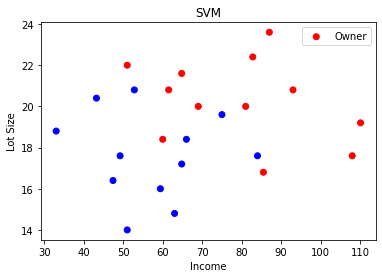

In [382]:
fig = plt.figure()
ax = fig.add_subplot()
#ax.scatter(X, y, c=y.iloc[:,0])
colors = np.array(["blue", "red"])
ax.scatter(mowers['Income'], mowers['Lot_Size'], c=colors[np.ravel(mowers['Ownership'])])
ax.set_xlabel('Income')
ax.set_ylabel('Lot Size')
ax.set_title('SVM')
ax.legend(('Owner','Nonowner'),loc=1)
plt.show()

We can see that the data points are clearly divided into two classes with few data points overlapped. We can assume that simple linear function is required to cut the datapoints into two classes.

## Train-Test Split ##

In [424]:
# split the data into validation and training set
train_df, test_df = train_test_split(mowers, test_size=0.30)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Ownership'
predictors = list(mowers.columns)
predictors.remove(target)

In [425]:
test_df

,Income,Lot_Size,Ownership
11,81.0,20.0,1
20,47.4,16.4,0
22,51.0,14.0,0
5,110.1,19.2,1
19,66.0,18.4,0
6,108.0,17.6,1
4,87.0,23.6,1
18,59.4,16.0,0


In [426]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

In [427]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

## SVM model with Liner Kernel ##

In [428]:
svm_lin_model = SVC(kernel="linear", probability = True)
_ = svm_lin_model.fit(train_X, np.ravel(train_y))

In [429]:
model_preds = svm_lin_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

## SVM model with rbf Kernel ##

In [430]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale', probability = True)
_ = svm_rbf_model.fit(train_X, np.ravel(train_y))

In [431]:
model_preds = svm_rbf_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

## SVM Model with poly kernel ##

In [432]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10, probability = True)
_ = svm_poly_model.fit(train_X, np.ravel(train_y))

In [433]:
model_preds = svm_poly_model.predict(test_X)
c_matrix = confusion_matrix(test_y, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

## Performance Analysis ##

The performance metrices indicate that the SVM model with linear kernel performs best in all measures. We can choose this model as our final model for prediction.

In [434]:
## 4.0 Summary

performance

,model,Accuracy,Precision,Recall,F1
0,linear svm,1.000,1.0,1.0,1.000000
0,rbf svm,0.875,0.8,1.0,0.888889
0,poly svm,0.750,1.0,0.5,0.666667


## Make a pickle file of the model  ##

In [435]:
import pickle

# save model
pickle.dump(svm_lin_model, open('./data/lawn_riding_mowers.pkl', "wb"))